In [15]:
import os
import pandas as pd
import numpy as np

import vincent_wrangle as wr
import vincent_explore as ex
import model as md

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## Project Planning

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

- Create README.md with data dictionary, project and business goals, and come up with initial hypotheses.

- Acquire data from the Codeup Database and create a function to automate this process. 
- Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process. 
- Store the acquisition and preparation functions in a wrangle.py module function, and prepare data in Final Report Notebook by importing and using the function.
- Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- Establish a baseline accuracy and document well.
- Train 3 different regression models.
- Evaluate models on train and validate datasets.
- Choose the model that performs the best and evaluate that single model on the test dataset.
- Document conclusions, takeaways, and next steps in the Final Report Notebook.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Wrangling/Train, Validate, Test

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [16]:
df = wr.get_zillow()
df.shape

(52319, 68)

In [17]:
train, validate, test = wr.wrangle_zillow()
train.shape, validate.shape, test.shape

((24431, 35), (10471, 35), (8726, 35))

##  Wrangling Takeaways
- Initially, a data frame consisting of 52,319 rows and 68 columns was pulled from the CodeUP database using SQL.
- Following the Data Acquisition the following preparation work was done to the acquired data:
   - Performed data preparation that can seen in detail within our wrangle.py file
   - Following data prepartion we were left with a dataframe consisting of 43,628 rows and 35 columns.
   - Split data into 3 datasets, train, validate and test.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Exploration

- Prior to modeling we have asked a few questions of the data and have used clustering to help in exploration.


## 1. Does the county a property is located in affect it's log error?

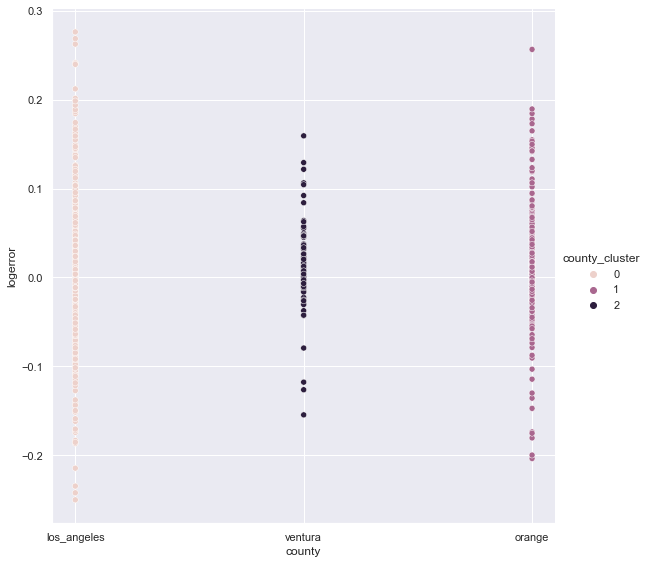

In [18]:
ex.countygraph(train)

#### Takeaways:
- For properties in ventura the logerror range seems to be lower than those in orange county and Los Angeles.
- Let's see if statistical can help that statement.

#### County statistical testing
(H_0): No difference in logerror between homes in ventura and homes not in ventura.\
(H_a): There is a difference in logerror between homes in ventura and homes not in ventura.

In [19]:
ex.ventura_test(train)

Fail to reject the Null Hypothesis.
        
No difference in logerror between homes in ventura and homes not in ventura.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 2. Does the tax_value of a house affect the logerror?

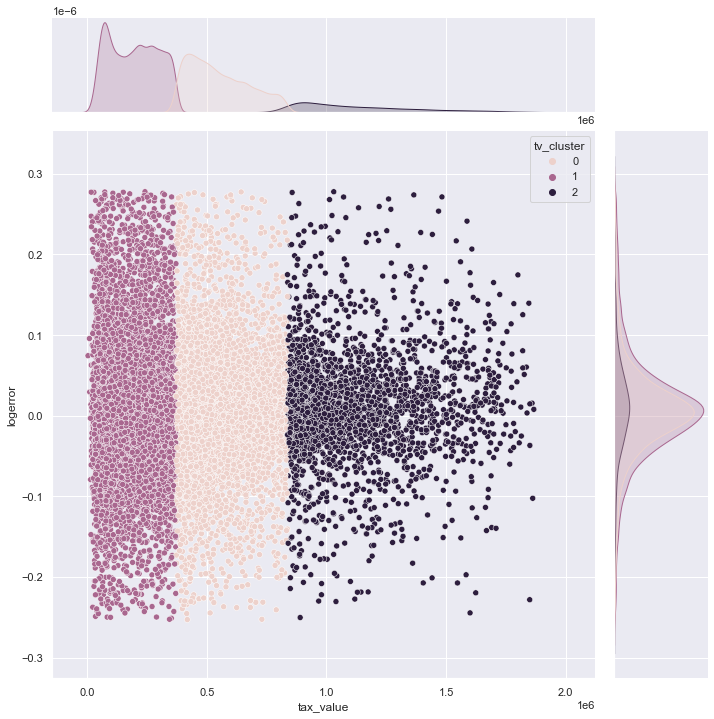

In [6]:
ex.tv_graph(train)

#### Takeaways
- From visualization it seems that  there does not seem to be a relationship between tax_value and logerror.
- Let's see if statistical can help that statement.

#### Tax_value testing
(H_0): There IS NOT a relationship between tax_value and logerror. \
(H_a): There IS a relationship between tax_value and logerror

In [7]:
ex.tax_corr_test(train)

Reject the Null Hypothesis.
        
There is linear correlation between tax_value and logerror.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 3. Does the ratio of home sqft to lot sqft affect logerror?

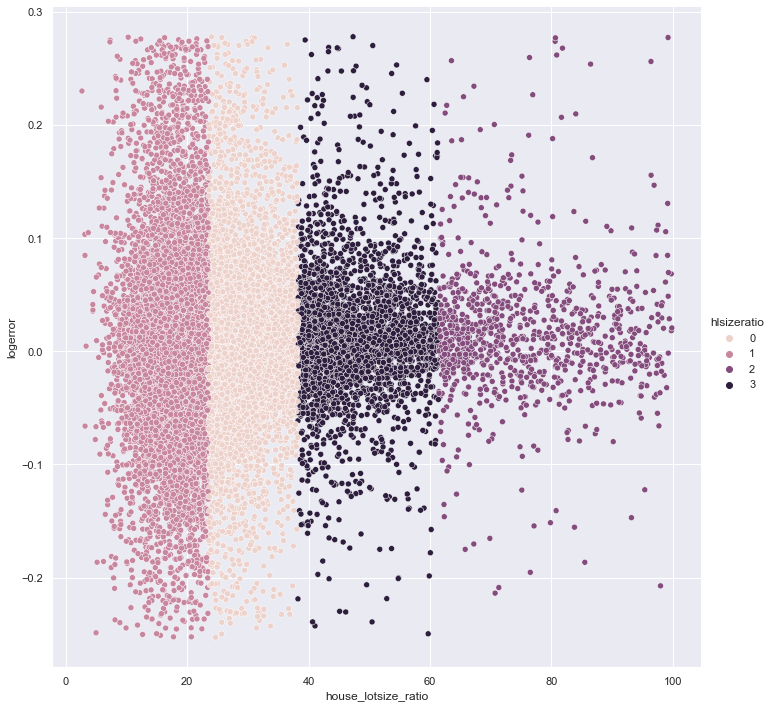

In [8]:
ex.htls_graph(train)

## Takeaways
- In this visual the clusters are not very helpful in that it just seems to split the data every 20 percent.
- It seems visually that once a home takes up more than 60 percent of the lotsize log error becomes closer to 0.
- Let's see if statistical can help that statement.


### House to lotsize ratio
H_0: Homes with a less than 60 percent house to lot ratio DO NOT have a logerror closer to 0. \
H_a: Homes with a less than 60 percent house to lot ratio DO have a logerror closer to 0.

In [9]:
ex.sqft_lsize_ttest(train)

Fail to reject the Null Hypothesis.
        
Homes with a less than 60 percent house to lot ratio DO NOT have a lower logerror.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 4. Does the year a house was built affect logerror?

<Figure size 1008x576 with 0 Axes>

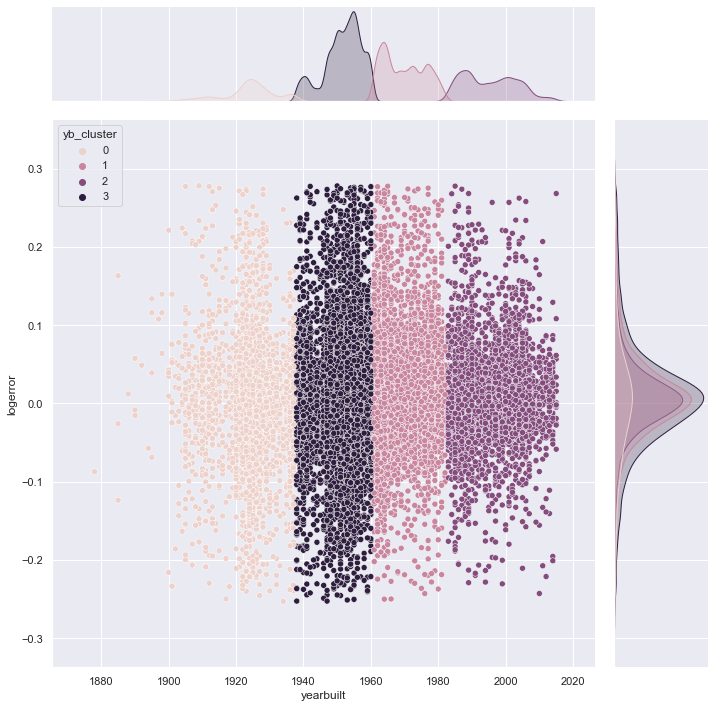

In [10]:
ex.yb_graph(train)

### Takeaways
- Again here the lcusters are not very useful.
- Lets see if this is true through statistical testing

#### Homes before 2010 vs homes after 2010 logerror difference.
(H_0): Homes built before 2010 DO NOT have a logerror cloeser to 0. \
(H_a): Homes built before 2010 DO have a logerror cloeser to 0.

In [11]:
ex.yb_test(train)

Fail to reject the Null Hypothesis.
        
Homes built before 2010 DO NOT have a logerror cloeser to 0.


## Exploration Summary
- In all of the exploration clustering did not seem to help in any way.
- Of all the features  only tax_value showed a relationship towards logerror.
- Whatever the case we will take these features into modeling and see if they assist in improving logerror prediction.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## Modeling 



- We will now go through using the features we investigated to see how they do with modeling.
- Prior to modeling let's scale or data with the investigated features.

In [12]:
X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = md.scale_data_xy_split()

In [13]:
md.run_da_stuff(X_train_scaled,y_train,X_validate_scaled,y_validate)

,model,rmse_train,r2_train,rmse_validate,r2_validate
0,baseline_mean,0.066777,-2.220446e-16,0.066643,0.000000
1,Linear Regression,0.066685,2.778587e-03,0.066576,0.002010
2,"LarsLasso, alpha 1",0.066777,0.000000e+00,0.066643,0.000000
3,Tweedie Regressor,0.066684,2.805690e-03,0.066579,0.001911
4,"Polynomial Features, D2",0.066526,7.500065e-03,0.066550,0.002792
5,"Polynomial Features, D3",0.066467,9.287360e-03,0.066583,0.001792


#### Now that we can see how our models perform we can see that the Polynomial Fea perform best so to test we go with that

In [14]:
md.test_tester(X_train_scaled,y_train,X_validate_scaled,y_validate,X_test_scaled,y_test)

,rmse,r2
baseline,0.066777,0.009287
train,0.066467,0.009287
validate,0.066583,0.001792
test,0.068054,0.001214


## Modeling takeaways

- The Polynomial Features Degrees = 3 model peformed the best out of all 4 models tested for both train and validate datasets. 

- However did not outperform baseline on the test dataset. Further research will need to be done to improve these models.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## Conclusions and Next Steps

- We believe that this dataset is simply too large and perhaps focusing in on smaller areas may provide some benefits.

- With the housing market being so volatile and prone to being affected by outside forces it can be hard to predict both pricing and improve logerror.

- With that said our final onclusion is that the features elected for our model are not ones to be utilized and further research will need to be done to improve the logerror.